In [1]:
# Getting Scripts
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', '..', 'scripts')))


## RSA Brute Force Timing Experiment

In this notebook, we explore the complexity of the RSA algorithm by attempting to compute the private key $ d $ (where $ d $ is the modular inverse of $ e $ modulo $ \phi(n) $) via brute force.

In the RSA algorithm, the public key consists of the values $ \{ e, n \} $, where $ n = p \times q $, and $ p $ and $ q $ are prime numbers. The private key $ d $ satisfies the following equation:

$$
d \times e \equiv 1 \pmod{\phi(n)}
$$

Where:

- $ p $ and $ q $ are prime numbers
- $ e $ is the public exponent, typically chosen such that it is coprime with $ \phi(n) $, where $ \phi(n) = (p-1) \times (q-1) $
- $ n = p \times q $ is the modulus used in both the public and private keys
- $ \phi(n) $ is Euler's totient function of $ n $, which is used to calculate the modular inverse
- $ d $ is the private key, and our goal is to compute it

For this experiment, we will:

- **Start with small primes**: For example, $ p = 43 $, $ q = 59 $, and $ e = 13 $, and compute $ d $ via brute force.
- **Scale up** to test the algorithm with:
  - Two four-digit primes
  - Two six-digit primes
  - Two eight-digit primes
  - Two ten-digit primes

As the prime numbers increase in size, the brute force method becomes exceedingly slow. To handle this, we will measure the speed of our iteration loop for a fixed number of iterations, and then extrapolate the total time required to find $ d $.

By the end of this experiment, we aim to understand the relationship between the size of the primes and the time it takes to compute $ d $ using brute force.

In [2]:

import time
import math
import matplotlib.pyplot as plt


## Helper Functions

We start by importing helper functions: a simple primality test, the greatest common divisor,
the Extended Euclidean Algorithm (to quickly compute the modular inverse), and a brute-force method
(or its time extrapolation) for finding \( d \).


In [3]:
from utils import modinv, run_and_save_results

## Brute-Force Search for d

This function tries to find $ d $ by checking every candidate $ k $ (starting from 1) until
it finds one such that:

$$
k \times e \mod \phi = 1.
$$

For small $ d $, we run the loop and measure the actual time. For large $ d $, we measure
the speed of our loop (iterations per second) using a fixed number of iterations and then
estimate the total time.



In [4]:


def brute_force_d(p, q, e):
    """
    For given primes p and q and public exponent e,
    compute phi, then find d (the modular inverse of e modulo phi)
    by brute force. Always does the actual calculation and returns the result.
    """
    phi = (p-1) * (q-1)
    
    # First, compute d quickly using modinv (for later reference)
    d_true = modinv(e, phi)

    # Perform the brute force search, regardless of d_true size
    start = time.time()
    candidate = 1
    while candidate < d_true+1:
        if (candidate * e) % phi == 1:
            d = candidate
            break
        candidate += 1
    elapsed = time.time() - start
    return d, elapsed


## Testing on the Small Example (p=43, q=59, e=13)

This test should complete quickly using the brute force search method.

Test parameters: p = 43, q = 59, e = 13



In [5]:

p_small, q_small, e_small = 43, 59, 13


run_and_save_results(brute_force_d, "2-digit", p_small, q_small, e_small, filename = os.path.join(os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data')), 'rsa_log.csv'))

2-digit
p: 43, q: 59, e: 13
d: 937, Execution Time: 0.000180 seconds




## Experiment: Brute-Force Timing for Different Prime Sizes

We use the following pairs:

- **Four-digit primes:** 1009, 1013  
- **Six-digit primes:** 100003, 100019  
- **Eight-digit primes:** 10000019, 10000079  
- **Ten-digit primes:** 1000000007, 1000000009  

We use \( e = 13 \) (which is prime) for all cases.

For each pair, we record the number of digits (using the digit length of \( p \)) and the time
(or estimated time) required to find \( d \) by brute force.

Define the prime pairs and corresponding label (digit-length)



In [6]:

# prime_pairs = {
#     "4-digit": (1009, 1013),
#     "6-digit": (100003, 100019),
#     "8-digit": (10000019, 10000079),
#     "10-digit": (1000000007, 1000000009)
# }

# e_val = 13
# results = {}

# print("Brute-force timing results (d computation):")
# for label, (p_val, q_val) in prime_pairs.items():
#     run_and_save_results(brute_force_d, label, p_val, q_val, e_val, filename = os.path.join(os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data')), 'rsa_log.csv'))



## Plotting the Results

We plot the measured/estimated times versus the prime size (by the number of digits).
If the time differences are large, we use a logarithmic scale on the y-axis.

Prepare data for plotting



In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data')), 'rsa_log.csv'))

# Convert 'No of Digits' into numerical values
df['Digits'] = df['No of Digits'].map({
    '2-digit': 2,
    '4-digit': 4,
    '6-digit': 6,
    '8-digit': 8,
    '10-digit': 10
})

df


,No of Digits,p,q,e,d,Execution Time (seconds),Digits
0,2-digit,43,59,13,937,0.00018,2


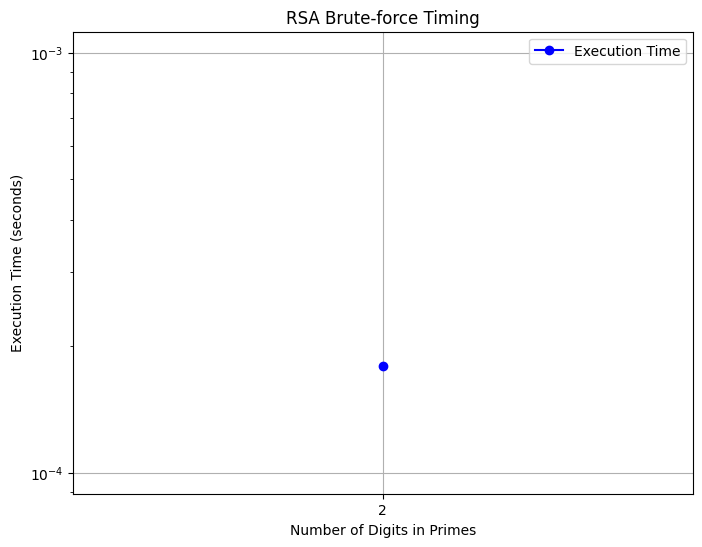

In [8]:
# Plot Execution Time vs Number of Digits
plt.figure(figsize=(8, 6))
plt.plot(df['Digits'], df['Execution Time (seconds)'], marker='o', linestyle='-', color='b', label="Execution Time")
plt.xlabel("Number of Digits in Primes")
plt.ylabel("Execution Time (seconds)")
plt.title("RSA Brute-force Timing")

# Set the y-axis to log scale
plt.yscale('log')

plt.xticks(df['Digits'])
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

## Conclusion

The experiment illustrates that even for modest increases in the prime sizes, the brute-force method
for finding the RSA private key $ d $ becomes extremely time‐consuming. While a brute-force approach
may work for small primes, the enormous search space for large primes (which are used in practical RSA)
makes this approach computationally infeasible. This underscores the strength of RSA and the importance
of efficient algorithms (such as the Extended Euclidean Algorithm) for computing modular inverses.
